<a href="https://colab.research.google.com/github/S-MERLINE-MARY/LGM-VIP-SEPT-21-BATCH-DATASCIENCEINTERN/blob/main/task1_beginnerslevel_LGMVIP_Sept'21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LetsGrowMore** -
**LGM Virtual Internship Program 2021** 

NAME : MERLINE MARY S


**DATA ANALYTICS INTERNSHIP**

TASK-1: BEGINNERS LEVEL  : IRIS FLOWER CLASSIFICATION PROJECT.

**DATE: 20/09/2021**

In [1]:
#LOADING REQUIRED PACKAGES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
from google.colab import files
uploaded= files.upload()

Saving Iris dataset.csv to Iris dataset.csv


In [4]:
from google.colab import files
uploaded= files.upload()

Saving iris.png to iris.png


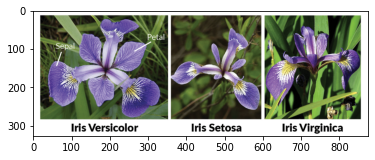

In [5]:
import matplotlib.image as mpimg
img=mpimg.imread("iris.png")
plt.imshow(img)

In [6]:
data=pd.read_csv("Iris dataset.csv")

In [7]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.info

<bound method DataFrame.info of       Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]>

In [9]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
# dimension od the dataset to find the fields and attributes of the datasets
data.shape

(150, 6)

In [12]:
# To know the attributes of the dataset
print(data.columns)
data.info()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


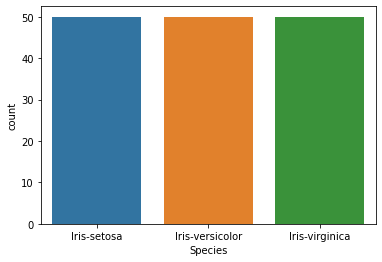

In [14]:
#viewing the frequency plot
sns.countplot(data['Species'],label="Size")
plt.show()

# **EDA (Exploratory Data Analytics)**

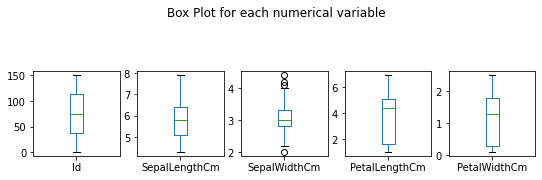

In [17]:
#BOXPLOT Analysis
data.drop('Species', axis=1).plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(9,9), title='Box Plot for each numerical variable')
plt.savefig('boxplot')
plt.show()

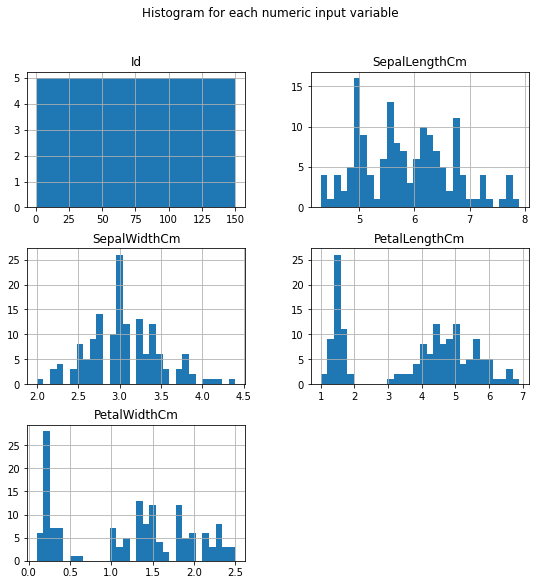

In [20]:
#HISTOGRAM Analysis
import pylab as pl
data.drop('Species' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('Histogram')
plt.show()

In [21]:
#ScatterPLot
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


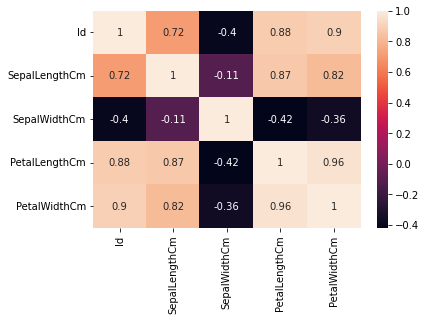

In [22]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [23]:
#Splitting of data
from sklearn.model_selection import train_test_split
feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = data[feature_names]
y = data.Species
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
# Dropping the NUll Values 
data=data.dropna(axis=0,how='any',thresh=1)
data.shape

(150, 6)

In [25]:
#preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Two Different classification techniques and go for the model with more accuracy**

**LOGISTIC REGRESSION** :
            Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes. ... Mathematically, a logistic regression model predicts P(Y=1) as a function of X.

In [27]:
# 1. Logistic Regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.93
Accuracy of Logistic regression classifier on test set: 0.89


**K-Nearest Neighbours**: K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

In [30]:
# 2.K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of the K-NN Model for Training data: {:.2f}'.format(knn.score(X_train,y_train)))
print('Accuracy of the K-NN Model for Testing data: {:.2f}'.format(knn.score(X_test,y_test)))

Accuracy of the K-NN Model for Training data: 0.96
Accuracy of the K-NN Model for Testing data: 0.97
